In [1]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #F4A460;
    color: white;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

 img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 100px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }


 video {
    width: 700px; /* Set the width of the video */
    height: auto; /* Adjust the height automatically */
    border-radius: 25px; /* Add a border radius for rounded corners */
    border: 5px solid #eee; /* Add a border */
    box-shadow: 0 10px 20px rgba(0, 0, 0, 0.19), 0 6px 6px rgba(0, 0, 0, 0.23); /* Add a box shadow */
    display: flex;
    controls: autoplay;
    align-items: center;
    justify-content: center;
    transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
  }

  video:active {
    box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
  }


</style>
''')

In [2]:
from IPython.display import HTML, display

video_path = 'https://media.istockphoto.com/id/1331521367/video/brown-bear-with-her-two-yearling-cubs-catches-a-sockeye-salmon-at-brooks-falls-in-katmai.mp4?s=mp4-640x640-is&k=20&c=3Ekv4ivmWaRDUKQo-jjZArAyKC7rGM5XiqEbPvXpICU='

# Create the HTML video element with autoplay enabled
video_html = f"""
<video width="320" height="240" controls autoplay>
  <source src="{video_path}" type="video/mp4">
  Your browser does not support the video tag.
</video>
"""
display(HTML(video_html))

## Data Information :

<div style="border: 2px solid #8B4513; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">
<p> &bull; Panda or Bear Image Classification</p> 

<p>    
&bull;Contente:
</p>

<p>&bull;The dataset contains panda and bear images ·
</p>     
    
<p>&bull;generated by DALLE Mini, an AI model that draws images from any prompt. 
</p>
      
    
<p>&bull;The task for this dataset is binary classification.</p>

<p>&bull;All images are scaled 256x256 </p>  

<p>&middot;Train Folder</p>

<p>&middot;Test Folder </p>

</div>

## Introudction :














<div style="border: 2px solid #8B4513; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


    
<p>-->  Welcome with you in my Notebook :</p>

<p>&bull; This unstructured Data loaded from Kaggle .</p> 

<p>&bull; This problem consider as Multi Classification images (pandas and crizy bear ). </p> 

<p>&bull; I used Deep learning Techniques by using tensorflow pkgs .</p>


<p>&bull; I divide Data into train set & tes sets after loading the data.</p>

<p>&bull; I used ImageDataGenerator for preprocessing the Data .</p>

<p>&bull; I make CNN models using Tensorflow , visualization tne model.</p>  
    

</div>

## Imports

In [3]:
# imports :
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras import models
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback
from tensorflow .keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.image as mpimg
import PIL
import PIL.Image

## preparing & Loading the Data :

In [4]:
import os
import glob
from PIL import Image

# Paths to data directories
train_data_path = '/kaggle/input/panda-or-bear-image-classification/PandasBears/Train'
test_data_path = '/kaggle/input/panda-or-bear-image-classification/PandasBears/Test'

# Function to load data from a directory
def load_data_from_directory(directory):
    data = []
    labels = []
    class_names = []
    
    # Iterate through subfolders
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        
        # Ensure it's a subfolder and not a file
        if os.path.isdir(subfolder_path):
            # Find all files in the subfolder
            files = glob.glob(os.path.join(subfolder_path, '*'))
            
            # Iterate through files
            for file_path in files:
                # Check the file extension to determine the file type
                if file_path.lower().endswith(('.jpg', '.jpeg', '.png')):
                    # Load image files
                    with Image.open(file_path) as image:
                        data.append(image)
                        labels.append(subfolder)
                else:
                    print(f"Skipping unsupported file type: {file_path}")
            
            # Add the subfolder name to class_names if it's not already there
            if subfolder not in class_names:
                class_names.append(subfolder)
    
    return data, labels, class_names

In [5]:
# Load data from train, val, and test directories
train_data, train_labels, train_class_names = load_data_from_directory(train_data_path)
test_data, test_labels, test_class_names = load_data_from_directory(test_data_path)

# Print the class names
print(f"Classes Number: {len(train_class_names)} Class")

Classes Number: 2 Class


In [6]:
# Print the Number of images inside  each set :

print(f"Number of training samples: {len(train_data)} images")
print(f"Number of test samples: {len(test_data)} images")

Number of training samples: 500 images
Number of test samples: 100 images


## Show a sample of Random sample of Train data:

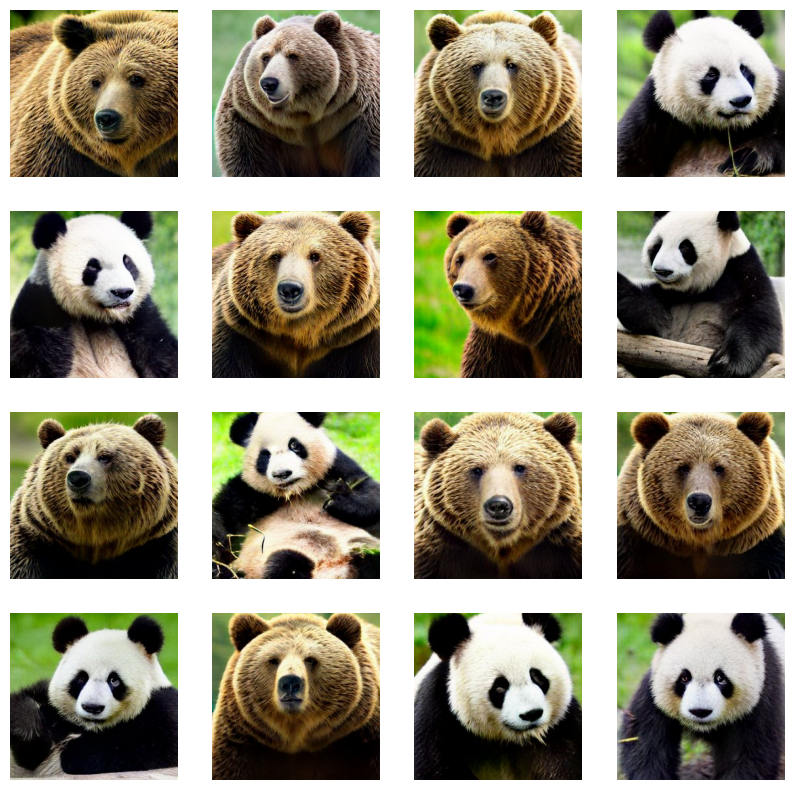

In [7]:
# Get the list of all subdirectories (classes)
classes = os.listdir(train_data_path)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(train_data_path, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

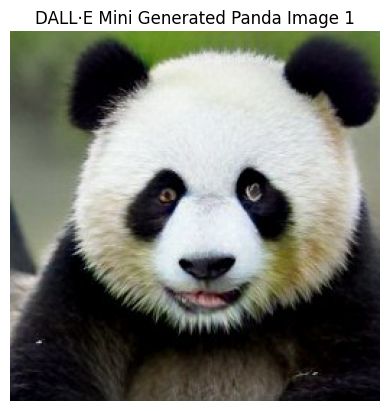

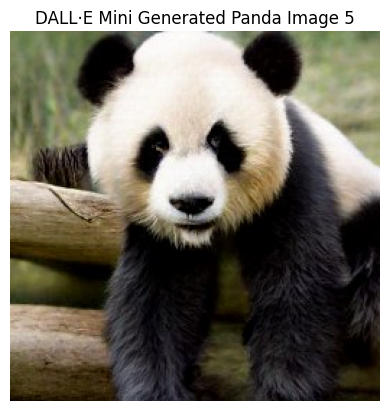

In [8]:
for i in range(1, 6):
    image = mpimg.imread(f"/kaggle/input/panda-or-bear-image-classification/PandasBears/Train/Pandas/{i}.jpeg")
    plt.imshow(image)
    plt.title(f"DALL·E Mini Generated Panda Image {i}")
    plt.axis("off")
    plt.show()


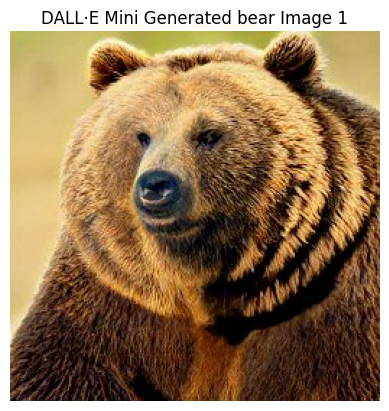

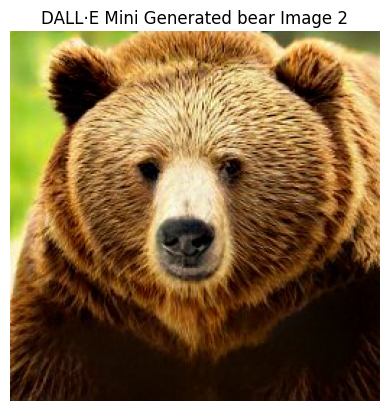

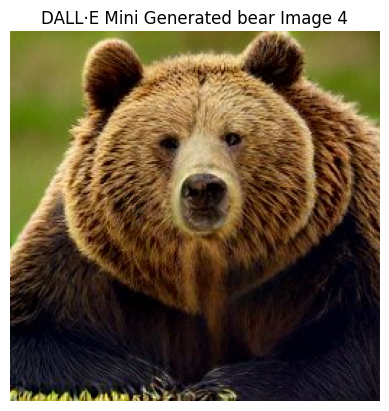

In [9]:
for i in range(1, 6):
    image = mpimg.imread(f"/kaggle/input/panda-or-bear-image-classification/PandasBears/Train/Bears/{i}.jpeg")
    plt.imshow(image)
    plt.title(f"DALL·E Mini Generated bear Image {i}")
    plt.axis("off")
    plt.show()

## preprocessing :

In [10]:
# Define the target size
target_size = (256, 256)

# Preprocessing and augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Flow training images from directory
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=target_size,
    batch_size=30,
    color_mode='rgb',
    class_mode='categorical'
)

# Preprocessing for validation data (no augmentation)
test_datagen = ImageDataGenerator(
    rescale=1/255
)

# Flow validation images from directory
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=target_size,
    batch_size=30,
    color_mode='rgb',
    class_mode='categorical'
)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
# preprocessing the data :
def reshape_and_normalize(images_data):
     # reshape :
    images=images.reshape(images_data.reshape[0],images_data.reshape[1],images_data.reshape[2],1)
    
    #Normalize :
    images=images_data/255
    return images


In [12]:
# Define a Callback class that stops training once accuracy reaches 99.9%

class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

## CNN MOdel :














<div style="border: 2px solid #8B4513; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


    
<p>&bull; Defination Layers  :</p>



<p>&bull; i used layers Conv2D ,MaxPooling2D ,Dropout ,Flatten ,Desne to build the CNN Model </p> 




<p>&bull; My CNN Modle cosist fro 3 Convential layers additional to flatten layers & Desne layer </p> 




<p>&bull; Output layer with 512 unit with Relu Activation Followed by Desne layer cnsist from 2 unit and sigmoid activation </p> 



<p>&bull; i compile the model by using Adam optimization with learning_rate=0.0001 and loss is categorical_crossentropy </p> 


<p>&bull; Data Agumention Techniques includes rescale ,rotation_range ,width_shift_range ,height_shift_range ,shear_range,zoom_range 
              horizontal_flip,fill_mode
</p> 


<p>&bull; after this training the model by 10 epochs  , verbose=2  </p> 

</div>

## Bulding CNN Model & Training it : ACC = 99 %

In [13]:
# Bulding the model :

print("\n CNN MODEL :")
model=Sequential([
    # first CNN_layer
    Conv2D(64,(3,3),input_shape=(256,256,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    # second layer
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #third layer
    Conv2D(128,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #fourth layer:
    Conv2D(64,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    #fifth layer:
    Conv2D(32,(3,3),activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512,activation="relu"),
    BatchNormalization(),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    # output layer:

    Dense(2,activation="softmax")
    
])

model.summary()

# compile the model :

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])



callbacks=myCallback()

# training the model :

print("\n model Training :")

history=model.fit(

    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=2,
    callbacks=[callbacks]
)


 CNN MODEL :


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 831,842 (3.17 MB)

 Trainable params: 829,986 (3.17 MB)

 Non-trainable params: 1,856 (7.25 KB)


 model Training :
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 - 114s - 7s/step - accuracy: 0.9400 - loss: 0.1437 - val_accuracy: 0.8500 - val_loss: 0.4217
Epoch 2/10

Reached 99% accuracy so cancelling training!
17/17 - 106s - 6s/step - accuracy: 0.9880 - loss: 0.0250 - val_accuracy: 0.5000 - val_loss: 2.6165


In [14]:
print("\n Model Prediction :")
y_predict=model.predict(test_generator)
y_predict[:10]


 Model Prediction :
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 926ms/step


array([[0.9966842 , 0.00331591],
       [0.9967556 , 0.00324445],
       [0.9980635 , 0.00193654],
       [0.99618477, 0.00381522],
       [0.9979664 , 0.00203348],
       [0.9974212 , 0.00257872],
       [0.99813145, 0.00186855],
       [0.9963422 , 0.00365786],
       [0.9979079 , 0.00209198],
       [0.9961084 , 0.00389155]], dtype=float32)

In [15]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_predict)} \n the max_value for prediction --->>> {np.max(y_predict)} ")

the min_value for prediction --->> 0.0010452145943418145 
 the max_value for prediction --->>> 0.9989547729492188 


In [16]:
# Model Evalution :
print("\n Model Evalute :")
model.evaluate(test_generator)


 Model Evalute :
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 852ms/step - accuracy: 0.4722 - loss: 2.7583


[2.616530179977417, 0.5]

## Result OF Training:

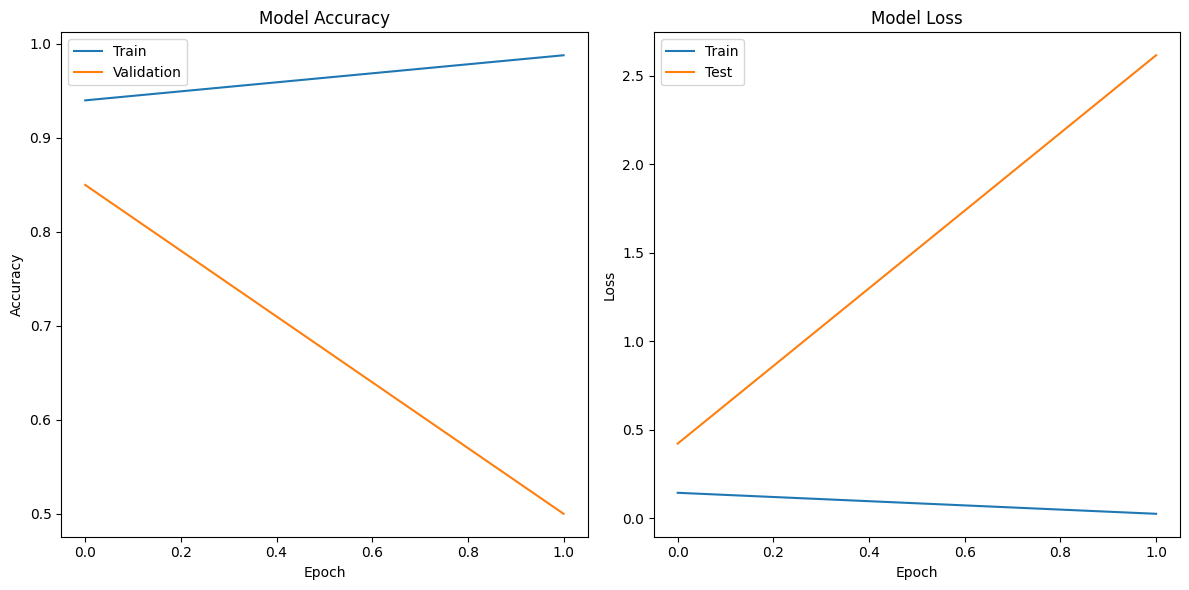

In [17]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Save & load the CNN model :

In [18]:
# Save the model
model.save('bear.h5')

# Load the trained model
model = tf.keras.models.load_model('bear.h5')

## Visualization model :

In [19]:
! pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 15.3 MB/s eta 0:00:00a 0:00:01


/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


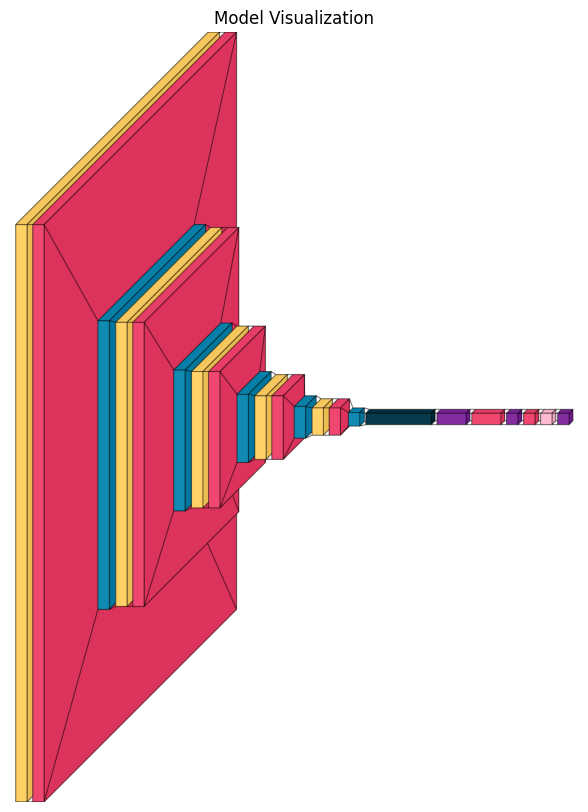

In [20]:
import visualkeras
from PIL import Image

# Save the visualization as an image file
visualization_path = 'model_visualization.png'
visualkeras.layered_view(model).save(visualization_path)

# Display the image using matplotlib
img = Image.open(visualization_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.title("Model Visualization")
plt.axis('off')
plt.show()

## Conclusion :














<div style="border: 2px solid #8B4513; padding: 10px; background-color: #F5F5F5; color: black; border-radius: 30px 45px 30px 45px;">


    
<p>&bull; in the Conclusion im whish that you could understand how to build build a convolutional neural networ (CNN) Model image                         Classification , Thank you for following my Notebooks .</p>




<p>&bull; Thank you for reading this notebook! If you found this content useful, please consider giving it an upvote.</p>




<p>&bull; Your support is greatly appreciated! .</p>




<p>&bull; Kaggle: Your Home for Data Science</p>




<p>&bull; <a href="https://www.kaggle.com/yourusername" target="_blank">Kaggle profile</a>.</p>



<p>&bull;  AbdalRhman Hebishy , DataScientist & Machine learning  Specialist .</p>
   

</div>


<img src="https://media.istockphoto.com/id/1319184864/vector/thank-you-vector-lettering-on-tropical-leaves-background-isolated.jpg?s=612x612&w=0&k=20&c=aqyiCtLdkUON3Gs0tR6PJ2R3tfD5ZERD9uS6Q8FYifE=" alt="My Image">